# <center>Practice 07. Classification Titanic Full</center>
## <center>Part 01. Titanic EDA</center>

Рассмотрим датасет пассажиров "Титаника", который можно скачать [тут](https://www.kaggle.com/competitions/titanic/data).

Описание датасета:
- **PassengerId** ––– id пассажира, можно взять за индекс
- **Survived** (целевой признак) ––– выжил ли пассажир (0 = Нет, 1 = Да);
- **Pclass** ––– класс билета (1 = 1st, 2 = 2nd, 3 = 3rd);
- **Sex** ––– пол (female или male)	
- **Age** ––– возраст в годах
- **SibSp** –––	количество братьев, сестёр (в том числе сводных) и супругов на борту	
- **Parch**	–––	количество детей и родителей на борту
- **Ticket** ––– номер билета	
- **Fare** ––– стоимость проезда пассажира	
- **Cabin** ––– номер каюты	
- **Embarked** ––– порт посадки пассажира (C = Cherbourg, Q = Queenstown, S = Southampton).

Необходимо решить задачу классификации и научиться предсказывать целовой признак **Survived** выживет ли пассажир по его нецелевым признакам.

Сперва подключим необходимые библиотеки.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку.

In [2]:
df = pd.read_csv('../../data/titanic/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Проверяем общее количество пропущенных значений.

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Признаки **Age, Cabin** и **Embarked** имеют пропущенные значения, особенно признак **Cabin**. Будем это учитывать в дальнейшем при очистке данных.

Также сразу появляется интерес посмотреть на статистику по целевому признаку. А именно, сколько каких значений он принимает. Для этого воспользуемся функцией <code>value_counts()</code>.

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Анализ данных, особенно достаточно сложный, легче воспринимается визуально. Поэтому часто будем прибегать к средствам визуализации. Например, удобно использовать функцию <code>countplot()</code> библиотеки seaborn.

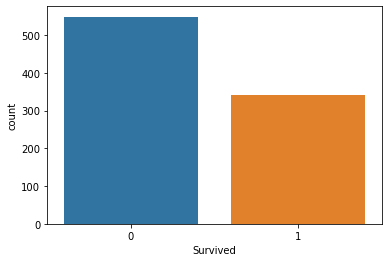

In [6]:
sns.countplot('Survived', data=df);  # можно не писать plt.show(), а точка с запятой убирает лишнюю информацию

Ну и конечно посмотрим каков был шанс выжить судя по данным из тестовой выборки.

In [7]:
df['Survived'].mean()

0.3838

Из пассажиров обучающей выборки чуть больше **38%** смогли уцелеть. Далее проведём первичный анализ признаков по отдельности и попарно. Особенно интересуют зависимости целевого признака от нецелевых. 

## Первичный анализ признаков

### Категориальный признак Sex

In [8]:
df.groupby(['Sex', 'Survived'])['Survived'].count()  # оба признака категориальные, группируем и считаем колличество

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

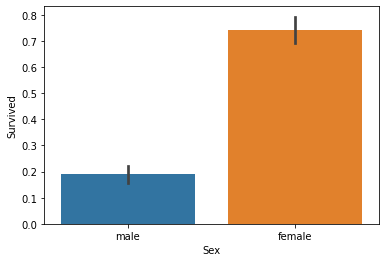

In [9]:
sns.barplot(x = "Sex", y = "Survived", data = df);

Выжило около **75%** женщин и всего около **20%** мужчин.

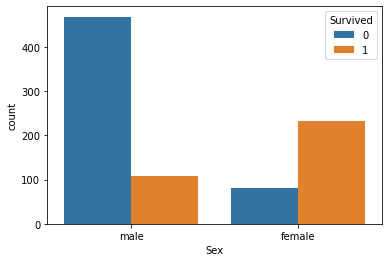

In [10]:
sns.countplot('Sex',hue='Survived',data=df);

Несмотря на то, что больншинство пассажиров были мужчинами, выжило намного больше женщин. Признак **Sex** кажется очень важным для этой задачи и имеющим сильную зависимость с целевым признаком. Проанализируем другие признаки.

## Порядковый признак Pclass

In [11]:
pd.crosstab(df['Pclass'], df['Survived'], margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


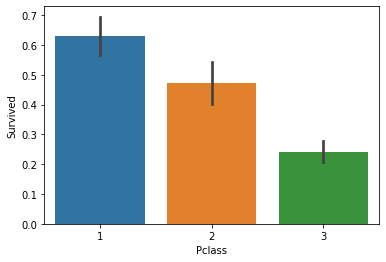

In [12]:
sns.barplot(x = "Pclass", y = "Survived", data = df);

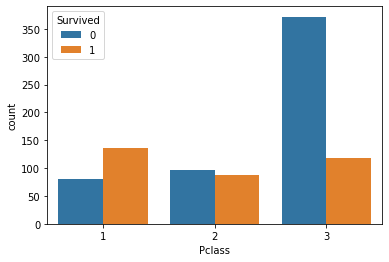

In [13]:
sns.countplot('Pclass', hue='Survived', data=df);

Несмотря на подавляющее большинство пассажиров третьего класса, в основном выжили пассажиры из классов повыше. Видимо пассажиры из первого класса были в приоритете при эвакуации/спасении. Признак **Pclass** возможно тоже важен для предсказания выживания.

Посмотрим на комбинацию рассмотренных признаков **Sex** и **Pclass** и связь с целевым признаком.

In [14]:
pd.crosstab([df['Sex'], df['Survived']], df['Pclass'], margins=True).style.background_gradient()

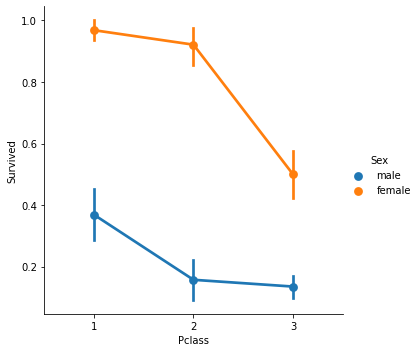

In [15]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df);

Женщины из 1го класса спаслись почти полностью (более **95%** из них выжили). Только 3 женщины из 94 в 1ом классе погибли. Видимо спасали в первую очередь женщин из первого класса, мужчины же, даже из первого класса, имеют низкий процент выживших.

В целом, отметим возмужную важность признака **Pclass**.

## Количественный признак Age


In [16]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

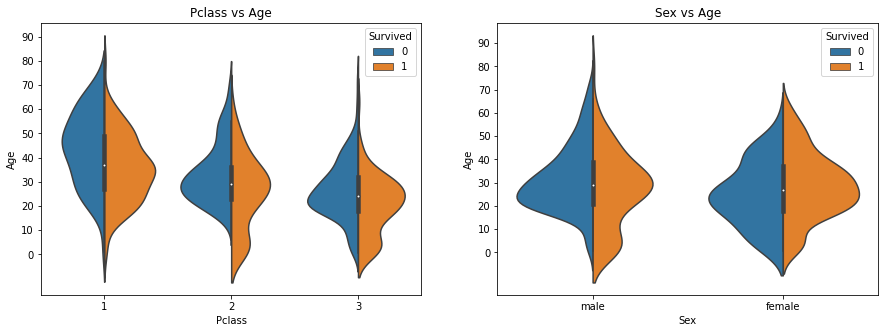

In [17]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot("Pclass", "Age", hue="Survived", data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass vs Age')
ax[0].set_yticks(range(0, 100, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=df, split=True, ax=ax[1])
ax[1].set_title('Sex vs Age')
ax[1].set_yticks(range(0, 100, 10))
plt.show()

- Независимо от класса, маленькие дети имеют хорошую долю выживших
- У мужчин доля выживших меньше, особенно у пожилых

Мы отмечали, что признак **Age** имеет 177 пропущенных значений. Данных очень мало, поэтому попытаемся не выкидывать эти наблюдения, а заполнить пропущенные значения чем то осмысленным.

Заменить пропущенные возраста просто на средний возраст пассажиров будет не очень хорошим решением.

Не поверите, но определить возраст точнее поможет имя, признак **Name**. Как? Этот признак содержит обращения Mr., Mrs., Dr. и т.д.

In [18]:
df['Mr_Mrs'] = 0
for i in df:
    df['Mr_Mrs']=df['Name'].str.extract('([A-Za-z]+)\.') #lets extract the Salutations
pd.crosstab(df['Sex'],df['Mr_Mrs']).style.background_gradient()

Mr_Mrs,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Упростим и объединим некоторые обращения.

In [19]:
df['Mr_Mrs'].\
replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],\
        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)
pd.crosstab(df['Sex'],df['Mr_Mrs']).style.background_gradient()

Mr_Mrs,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [20]:
df.loc[(df['Mr_Mrs'] == 'Mr') & (df['Sex'] == 'female'), "Mr_Mrs"] = 'Mrs' # исправляем обращение к доктору женщине
pd.crosstab(df['Sex'],df['Mr_Mrs']).style.background_gradient()

Mr_Mrs,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,128,0
male,40,0,528,0,9


In [21]:
df.groupby('Mr_Mrs')['Age'].mean()  # теперь более точно сможем задать средние возраста по группам пассажиров

Mr_Mrs
Master     4.574167
Miss      21.860000
Mr        32.699755
Mrs       36.099099
Other     45.888889
Name: Age, dtype: float64

In [22]:
df.loc[(df['Age'].isnull()) & (df['Mr_Mrs'] == 'Master'), 'Age'] = 5
df.loc[(df['Age'].isnull()) & (df['Mr_Mrs'] == 'Miss'), 'Age'] = 22
df.loc[(df['Age'].isnull()) & (df['Mr_Mrs'] == 'Mr'), 'Age'] = 33
df.loc[(df['Age'].isnull()) & (df['Mr_Mrs'] == 'Mrs'), 'Age'] = 36
df.loc[(df['Age'].isnull()) & (df['Mr_Mrs'] == 'Other'), 'Age'] = 46
df['Age'].isnull().any()  # избавились от пропусков в данных о возрасте

False

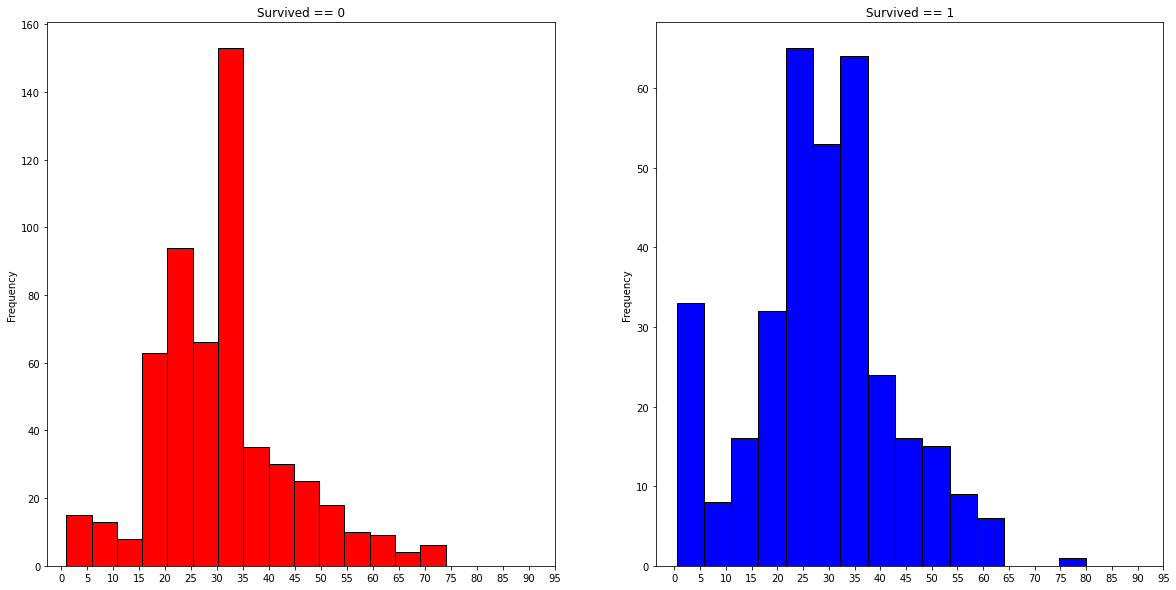

In [23]:
_, ax = plt.subplots(1, 2, figsize=(20, 10))
df[df['Survived'] == 0]['Age'].plot.hist(ax=ax[0], edgecolor='black', color='red', bins=15)
ax[0].set_title('Survived == 0')
x1 = list(range(0, 100, 5))
ax[0].set_xticks(x1)
df[df['Survived'] == 1].Age.plot.hist(ax=ax[1],color='blue',edgecolor='black', bins=15)
ax[1].set_title('Survived == 1')
x2 = list(range(0, 100, 5))
ax[1].set_xticks(x2)
plt.show()

- Не только женщин, но и самых маленьких детей спасали в первую очередь

- Самый пожилой 80-летний пассажир также был спасён

- Больше всего погибло молодых людей около 30 лет

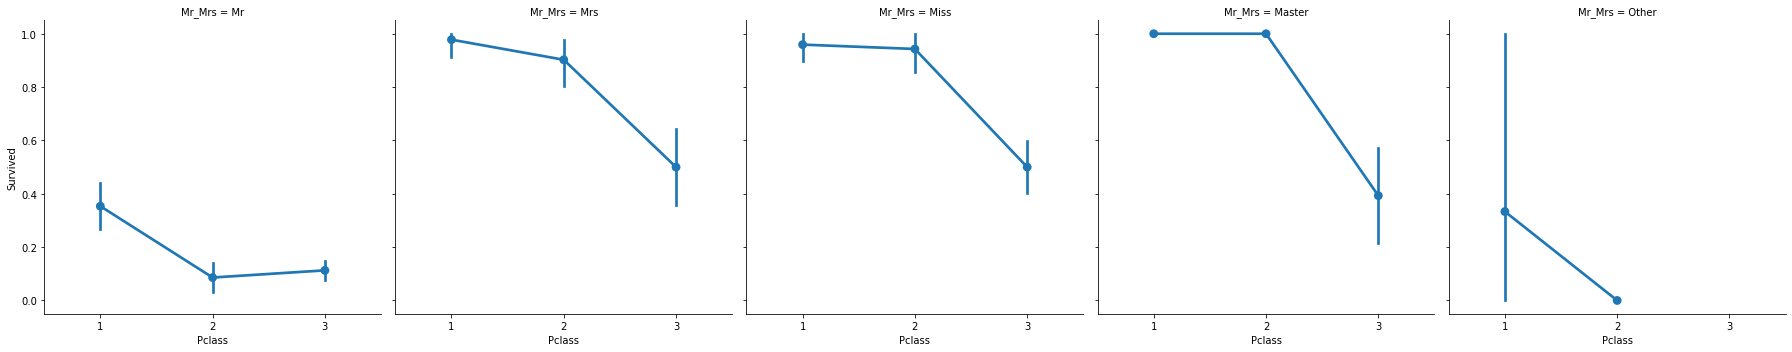

In [24]:
sns.factorplot('Pclass', 'Survived', col='Mr_Mrs', data=df);

Независимо от класса пассажиров, в первую очередь спасали женщин и детей.

## Категориальный признак Embarked

In [25]:
pd.crosstab([df['Embarked'], df['Pclass']], [df['Sex'], df['Survived']], margins=True).\
        style.background_gradient()

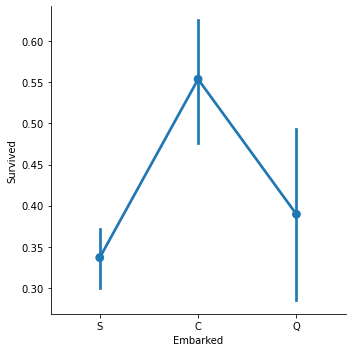

In [26]:
sns.factorplot('Embarked', 'Survived', data=df);

Есть различия шанса выжить для пассажиров с разными портами посадки.

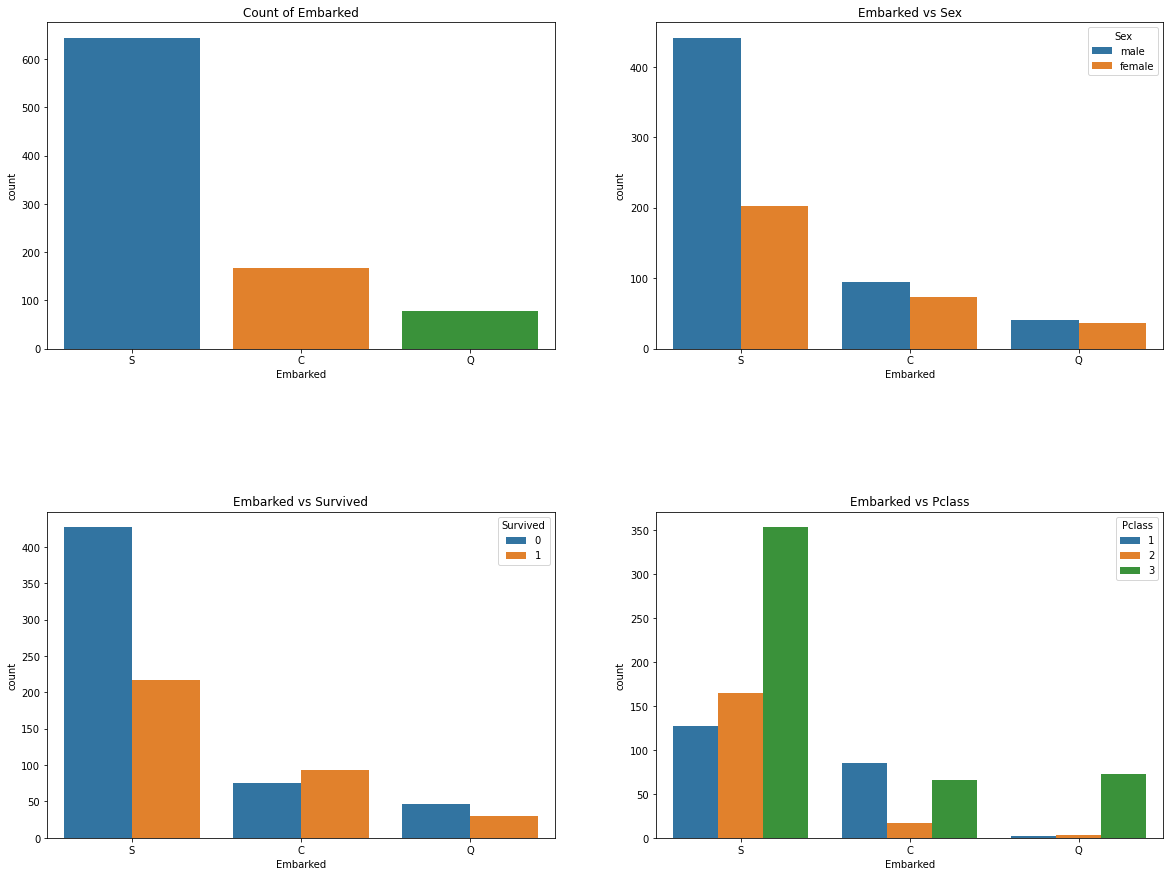

In [27]:
_, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df, ax=ax[0,0])
ax[0,0].set_title('Count of Embarked')
sns.countplot('Embarked', hue='Sex', data=df, ax=ax[0,1])
ax[0,1].set_title('Embarked vs Sex')
sns.countplot('Embarked', hue='Survived', data=df, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Самая большая посадка в порту S, преимущественно мужчин и в 3ий класс
- Кажется что те, кто сел в порту C более удачливые, вероятно из-за соотношения богатых к бедным и женщин к мужчинам

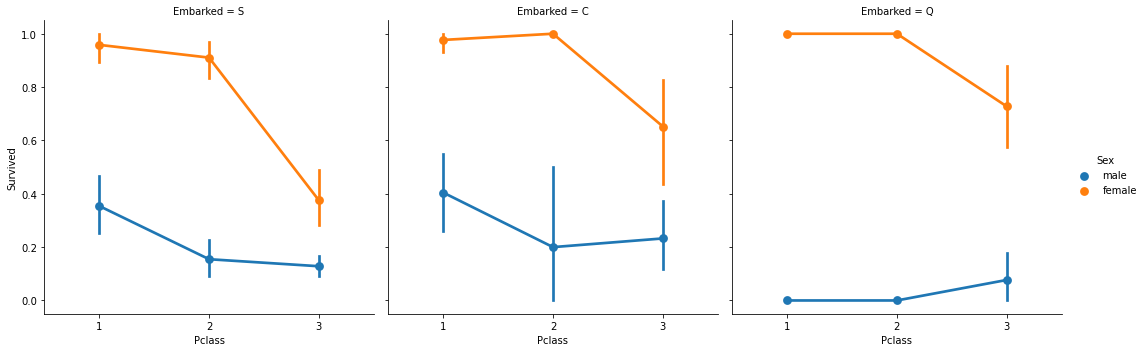

In [28]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=df);

- Женщины из 1го и 2го класса почти все выжили, не важно где сели.
- Для женщин наименьший шанс выжить, если они сели в порту S и они из 3го класса. Этот шанс сравним с шансом мужчин из 1го класса.
- Самая печальная картина для мужчин, если они сели в порту Q, так как почти все они пассажиры 3го класса.

Также помним про нулевые значения признака **Embarked**.

In [29]:
df['Embarked'].isnull().sum()

2

Всего два значения пропущены. Так как в большинстве случаем пассажиры сели в порту S, то с чистой совестью заполняем эти значения этим портом.

In [30]:
df['Embarked'].fillna('S', inplace=True)

In [31]:
df['Embarked'].isnull().any()  # избавились от пропущенных значений признака Embarked

False

## Дискретный признак SibSp
- Sibling = сводные/родные братья/сестры
- Spouse = муж/жена

In [32]:
pd.crosstab(df['SibSp'], df['Survived']).style.background_gradient()

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


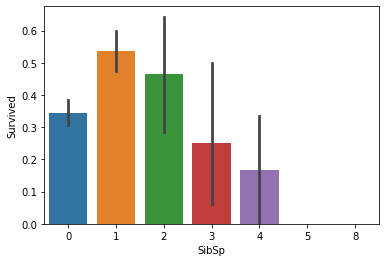

In [33]:
sns.barplot('SibSp', 'Survived', data=df);

In [34]:
pd.crosstab(df['SibSp'],df['Pclass']).style.background_gradient()

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- Кажется, что с ростом количества родных на борту сильно уменьшается шанс выжить начиная с 3 человек. Если на борту 5 или более родственников, то такие пассажиры точно погибали. Вероятно из-за попыток спасти семью, а не себя.
- Однако причной является признак Pclass. Последняя таблица показывает, что все большие семьи были из 3го класса.

## Дискретный признак Parch

In [35]:
pd.crosstab(df.Parch, df.Pclass).style.background_gradient()

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Опять же, большие семьи почти полностью из 3го класса.

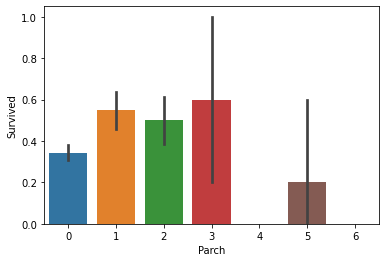

In [36]:
sns.barplot('Parch', 'Survived', data=df);

- Опять же, не большое количество родственников увеличивает шансы выжить
- Однако начиная с 4 шансы сильно уменьшаются

## Выводы:
- **Sex:** Скорее выживут женщины.
- **Pclass:** 1ый класс имеет хорошие шансы выжить (женщины почти 100%), женщины из 2го классов тоже. 3ий класс пострадал больше всех.
- **Age:** Дети около 5-10 лет имели хороший шанс выжить. Пассажиры окол 30-35 лет часто погибали.
- **Embarked:** Кажется, что пассажирам, севшим в порту C повезло больше.
- **Parch+SibSp:** Наличие 1-3 таких родственников показало хороший шанс выживания. Лучше, чем быть одному или в составе большой семьи, которая почти всегда из 3го класса.

## Корреляция признаков

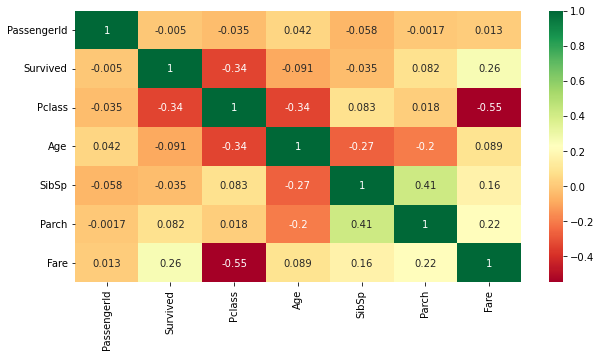

In [37]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Слишком большой корреляции нету, которая позволила бы сразу убрать из рассмотрения некоторые признаки, несущие в себе в основном избыточную информацию.
Разве что можно присмотреться к **Pclass vs Fare**, и **SibSp vs Parch**.

Но таким образом мы сравнили только количественные признаки.

Пока продолжим анализ со всеми признаками.

## <center>Part 02. Feature Engineering and Data Cleaning</center>

Далеко не всегда все признаки в данных важны или представляются в нужном виде. Поэтому после некоторого анализа данных и признаков часто нужно добавлять новые признаки и удалять неважные. Новые признаки могут быть основаны на некоторых наблюдениях в результате анализа данных, могут явно вычислятся из других признаков.

Например, мы добавили признак **Mr_Mrs**, который позволил нам дополнить пропущенные значения в возрасте.

Посмотрим какие полезные признаки ещё сможем создать, а какие существующие сможем привести к более удобному виду для дальнейшего обучения.

## Новый признак возрастные категории Age_category

У категориальных признаков есть свои преимущества по сравнению с количественными. Например, по категориальным признакам можно группировать.

Воспользуемся признаком **Age** и выделим во множестве его значений (от 0 до 80) категории (интервалы).

In [38]:
df['Age_category'] = 0  # заполняем сначала значения нового признака нулями
df.loc[df['Age'] <= 16, 'Age_category'] = 0  # далле разбиваем возраста на 5 категорий
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age_category'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age_category'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age_category'] = 3
df.loc[df['Age'] > 64, 'Age_category'] = 4
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr_Mrs,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


Ещё раз взглянем на корреляцию признаков. 

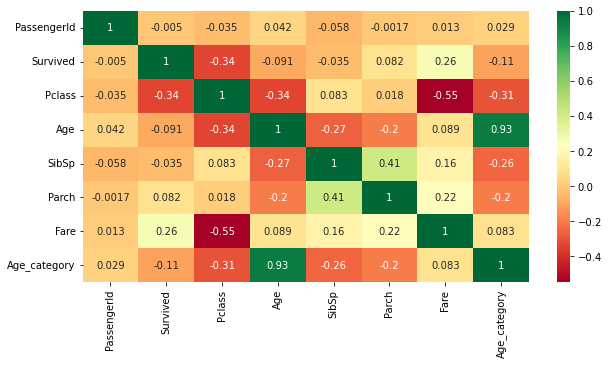

In [39]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [40]:
df['Age_category'].value_counts().to_frame().style.background_gradient(cmap='summer')  # пассажиров в категориях

,Age_category
1,382
2,325
0,104
3,69
4,11


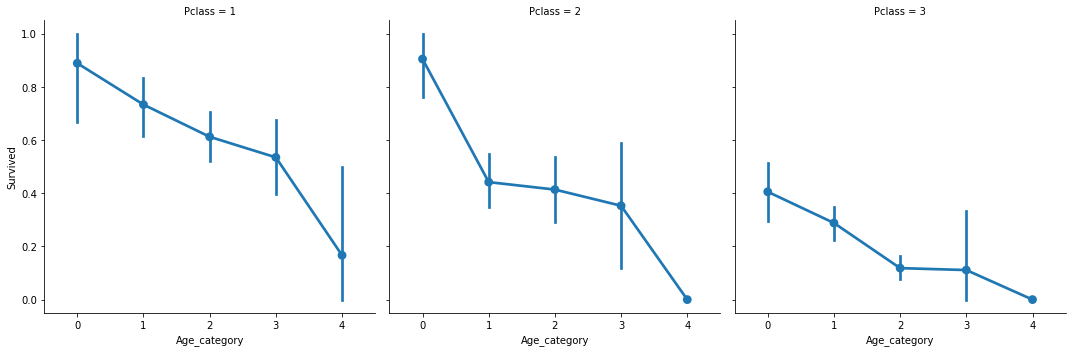

In [41]:
sns.factorplot('Age_category', 'Survived', data = df,col = 'Pclass')
plt.show()

Делаем вывод, что вероятность выжить снижалась с ростом возраста независимо от класса билета.

## Новые признаки размеров семей Family_Size и Alone
Такие признаки позволят нам разглядеть зависимости от размеров семей, которые спрятаны в **Parch** и **SibSp**.

In [42]:
df['Family_Size'] = 0
df['Family_Size'] = df['Parch'] + df['SibSp']  # размер семьи
df['Alone'] = 0
df.loc[df['Family_Size'] == 0, 'Alone'] = 1  # путешествовал ли пассажир один

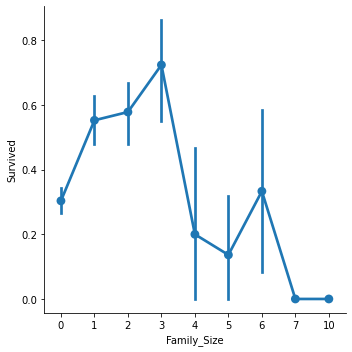

In [43]:
sns.factorplot('Family_Size', 'Survived', data=df);

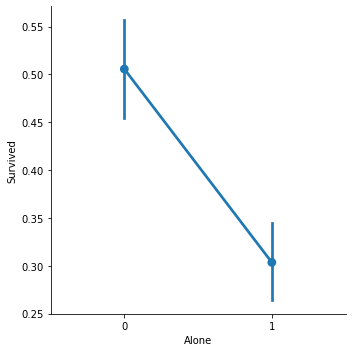

In [44]:
sns.factorplot(x='Alone', y='Survived', data=df);

Шансы вижить существенно меньше для тех, кто был один или с семьей размера от 4

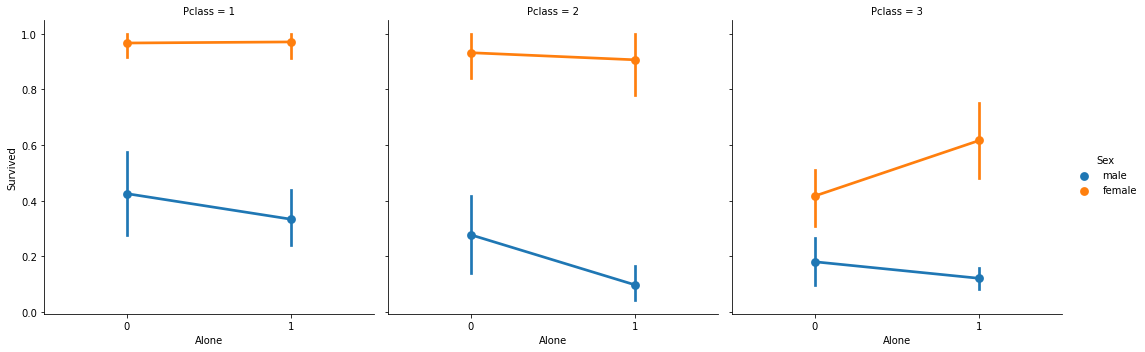

In [45]:
sns.factorplot('Alone', 'Survived', data=df, hue='Sex', col='Pclass');

Быть одному - плохо, независимо от пола или класса билета. Кроме женщин в 3ем классе, где просто было больше женщин, путешествующих одних.

## Новый признак категорий стоимости билета Fare

Разобъём область значений на интервалы.

In [46]:
df['Fare_category'] = pd.qcut(df['Fare'], 5)
df.groupby(['Fare_category'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_category,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


Шансы выжить повышаются с ростом стоимости билета. Тут конечно и связь с классом билета.

In [47]:
df['Fare_category'] = 0
df.loc[df['Fare'] <= 7.91, 'Fare_category'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare_category'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare_category'] = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 513), 'Fare_category'] = 3

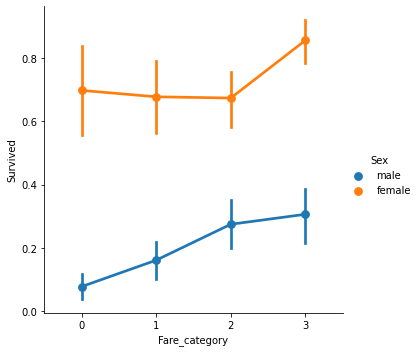

In [48]:
sns.factorplot('Fare_category', 'Survived', data=df, hue='Sex');

Этот признак может быть полезен в дальнейшем процессе обучения.

## Трансформация строк в числа

Подготавливаем данные, приводим к удобному для обучению формату.

In [49]:
df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
df['Mr_Mrs'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

## Удаление ненужных признаков

**Name** –– неважно, категории обращений мистер и тд уже сделали.

**Age** –– вместо него будем использовать категории возрастов **Age_category**.

**Ticket** –– неважно.

**SibSp** и **Parch** –– вместо них **Family_Size** и **Alone**

**Fare** –– вместо него **Fare_category**.

**Cabin** –– много пропущенных значений, есть повторяющиеся, не понятно что делать с этим признаком.

**PassengerId** –– просто индекс.

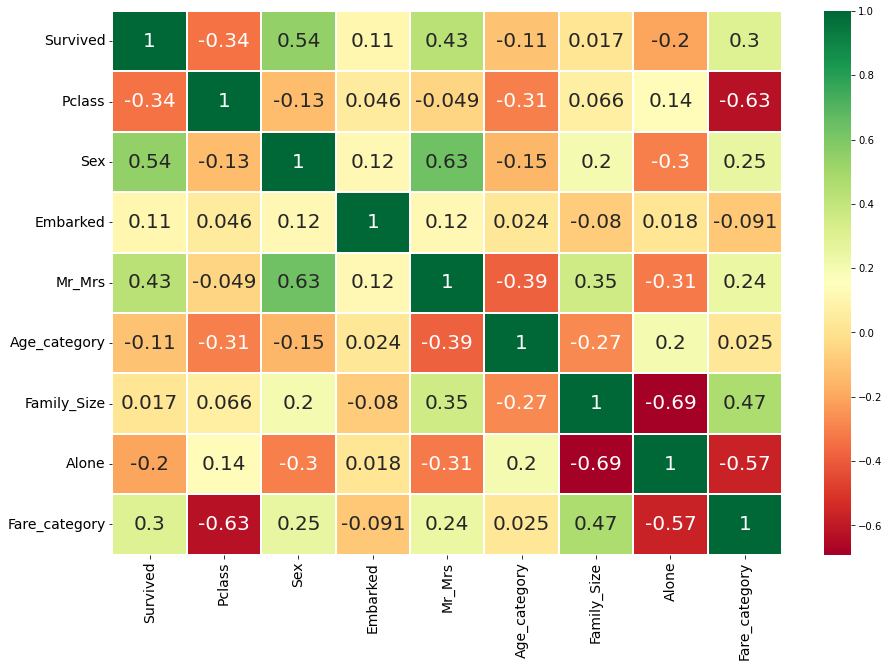

In [50]:
df.drop(['Name', 'Age', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Тут можно исследовать полученные положительные и отрицательные корреляции между признаками. Далее уже необходимо выбирать семейства моделей машинного обучения для решения задачи классификации.

In [51]:
model_accuracies = {}  # сюда будем сохранять качество натренированных моделей

## <center>Part 03. Логистическая регрессия - Logistic Regression</center>

### Входные данные
<br>
<img src="https://www.tutorialspoint.com/machine_learning_with_python/images/star.jpg" width="500px"/>

### Разделяющая гиперплоскость
<br>
<img src="https://www.tutorialspoint.com/machine_learning_with_python/images/red_line.jpg" width="500px"/>

### Сигмоидная функция для оценки вероятности принадлежности к классу 1
<br>
<img src="https://qph.fs.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba" width="500px"/>

- Строит гиперплоскость, разделяющую классы
- Даёт веса признакам, как и в линейной регрессии
- Можно получить вероятности принадлежености к каждому классу

Сделаем простое разделение train/test с использованием train_test_split(). А также масштабируем данные.

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cols = ["Pclass","Sex","Embarked","Mr_Mrs","Age_category","Family_Size","Alone","Fare_category"] 
X = df[cols]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

### Выбор подмножества признаков с помощью RFE

Если есть estimator, который позволяет раздать веса признакам (у нас уже была такая модель - линейной регрессии), то recursive feature elimination (RFE) рассматривает рекурсивно все меньше и меньше признаков, убирая наименее важные. В результате чего дойдет до желанного количества признаков.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# отберём с помощью RFE 5 признаков
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe = rfe.fit(X_train_scaled, y_train)
# выведем эти 5 признаков
print('Selected features: %s' % list(rfe.get_feature_names_out(cols)))

Selected features: ['Pclass', 'Sex', 'Mr_Mrs', 'Family_Size', 'Alone']


RFECV позволяет выбрать оптимальное количество признаков кросс-валидацией

Optimal number of features: 7
Selected features: ['Pclass', 'Sex', 'Embarked', 'Mr_Mrs', 'Age_category', 'Family_Size', 'Alone']


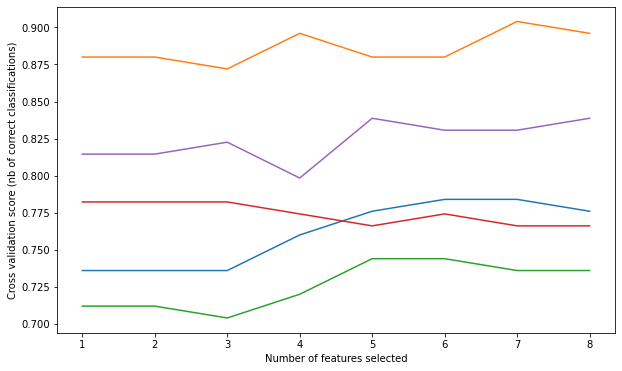

In [54]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

selected_features_logregr = list(rfecv.get_feature_names_out(cols))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features_logregr)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

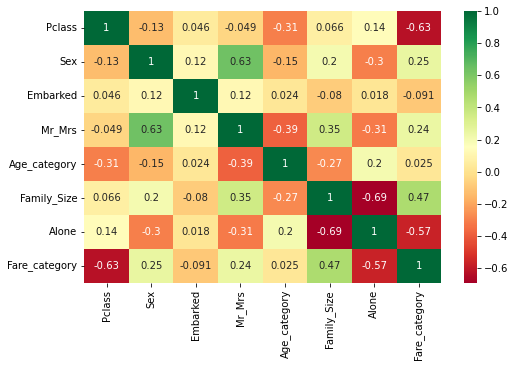

In [55]:
X_logregr = df[selected_features_logregr]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Обучение первой модели

Train/Test split results:
LogisticRegression accuracy is 0.813
LogisticRegression log_loss is 0.411
LogisticRegression auc is 0.888


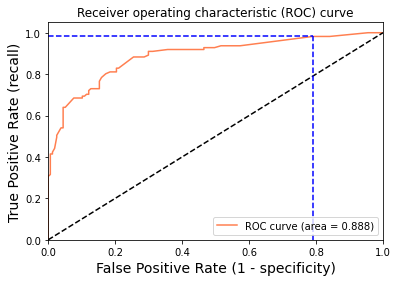

Using a threshold of 0.095 guarantees a sensitivity of 0.982 and a specificity of 0.210, i.e. a false positive rate of 78.98%.


In [56]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train_logregr, X_test_logregr, y_train_logregr, y_test_logregr = train_test_split(X_logregr, y, test_size = 0.3, random_state=42) # уже с отобранными призаками

scaler_logregr = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled_logregr = scaler_logregr.fit_transform(X_train_logregr)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled_logregr = scaler_logregr.transform(X_test_logregr)

logreg = LogisticRegression()
logreg.fit(X_train_scaled_logregr, y_train_logregr)
y_pred = logreg.predict(X_test_scaled_logregr)
y_pred_proba = logreg.predict_proba(X_test_scaled_logregr)[:, 1]  # предсказываем вероятность по классам
[fpr, tpr, thr] = roc_curve(y_test_logregr, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_logregr, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_logregr, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # индекс первого threshold с tpr > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### K-fold кросс-валидация с использованием cross_val_score()

Обучаем модель с кросс-валидацией

In [57]:
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
scores_accuracy = cross_val_score(logreg, X_train_scaled_logregr, y_train_logregr, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X_train_scaled_logregr, y_train_logregr, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X_train_scaled_logregr, y_train_logregr, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.806
LogisticRegression average log_loss is 0.456
LogisticRegression average auc is 0.847


### Подбор гиперпараметров с помощью GridSearchCV + multiple scorers

Обучаем модель с CV и ищем по сетке гиперпараметр C (чем меньше C тем больше регуляризация).

best estimator: LogisticRegression(C=0.20001000000000002)
best params: {'C': 0.20001000000000002}
best score: 0.8057548387096775


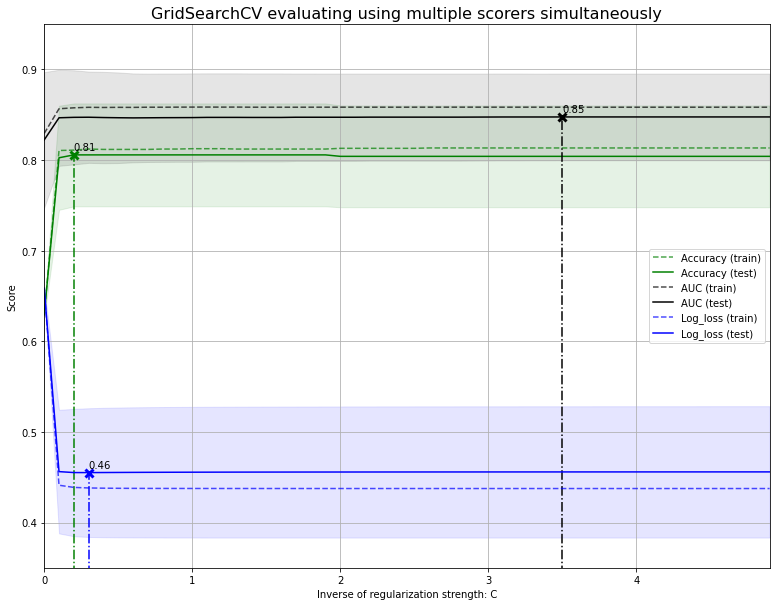

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.arange(1e-05, 5, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=5, refit='Accuracy')

gs.fit(X_train_scaled_logregr, y_train_logregr)
results = gs.cv_results_

print('='*20)
print("best estimator: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(13, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.gca()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

### GridSearchCV + multiple scorers + RepeatedStratifiedKFold + pipeline

Поиск по сетке с помощью CV, повторяющийся несколько раз, с масштабированием и различными scorers. StratifiedKFold позволяет разделять выборки с сохранением соотношения объектов каждого класса (стратифицированно).

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

C = np.arange(1e-05, 5, 0.1)

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

log_reg = LogisticRegression(random_state=11)

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X_train_logregr, y_train_logregr)
results = log_clf.cv_results_


print('='*80)
print("best estimator: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
model_accuracies['Logistic Regression'] = log_clf.score(X_test_logregr, y_test_logregr)
print("test score:", model_accuracies['Logistic Regression'])
#print("test score:", accuracy_score(y_test_logregr, log_clf.best_estimator_.predict(X_test_logregr))) # другой способ
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 LogisticRegression(C=0.20001000000000002, random_state=11))])
best params: {'clf__C': 0.20001000000000002}
best score: 0.8035174193548387
test score: 0.8134328358208955


Визуализация GridSearchCV

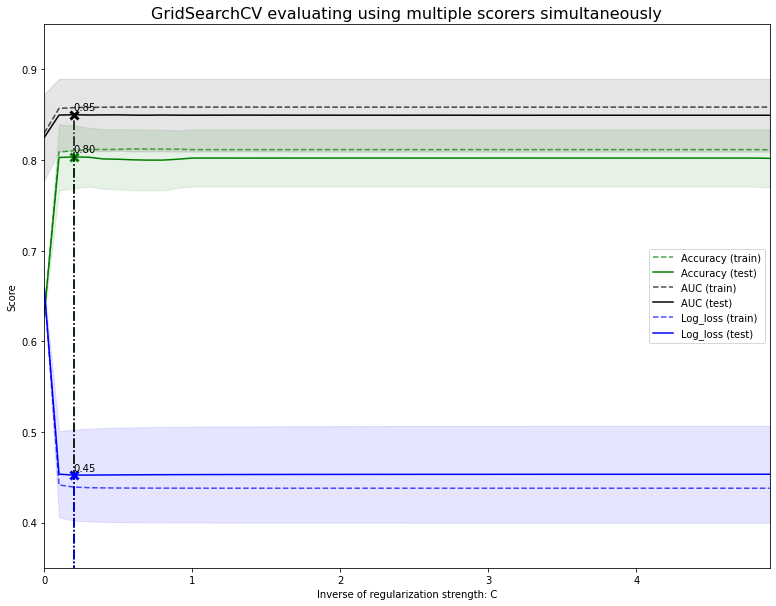

In [60]:
plt.figure(figsize=(13, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

X_axis = np.array(results["param_clf__C"].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [61]:
print("Accuracy of Logistic Regression: {:.4f}".format(model_accuracies['Logistic Regression']))

Accuracy of Logistic Regression: 0.8134


## <center>Part 04. K-Nearest Neighbour (k-NN)</center>

**k-NN Algorithm**
<br>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png"/>

- Метрический метод
- Опирается на гипотезу компактности
- Боится больших размерностей
- Легко обучается (лениво), просто хранит обучающую выборку

In [62]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(1, 11, 2) # n_neighbors means k
weights = ['uniform', 'distance'] # weight of each neighbor

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

knn = KNeighborsClassifier()  

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=12)

knn_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',knn)])

knn_clf = GridSearchCV(estimator=knn_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__n_neighbors=n_neighbors, clf__weights=weights), refit='Accuracy')

knn_clf.fit(X_train, y_train)
results = knn_clf.cv_results_


print('='*80)
print("best estimator: " + str(knn_clf.best_estimator_))
print("best params: " + str(knn_clf.best_params_))
print('best score:', knn_clf.best_score_)
model_accuracies['KNN'] = knn_clf.score(X_test, y_test)
print("test score:", model_accuracies['KNN'])
#print("test score:", accuracy_score(y_test, knn_clf.best_estimator_.predict(X_test))) # другой способ
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=3))])
best params: {'clf__n_neighbors': 3, 'clf__weights': 'uniform'}
best score: 0.821181935483871
test score: 0.7873134328358209


In [63]:
print("Accuracy of KNN: {:.4f}".format(model_accuracies['KNN']))

Accuracy of KNN: 0.7873


## <center>Part 05. Naive Bayes (NB)</center>

**Naive Bayes Algorithm**
<br>
<img src="https://s3.ap-south-1.amazonaws.com/techleer/204.png" width="500px"/>

- Вероятностный метод
- Наивоное предположение независимого вклада нецелевых признаков в предсказание целевого
- Можно получить вероятности принадлежености к каждому классу

In [64]:
from sklearn.naive_bayes import GaussianNB

priors = [None, [0.62, 0.38]]
var_smoothing = np.logspace(0, -9, num=100) # portion of the largest variance of all features that is added to variances for calculation stability

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

nb = GaussianNB()  

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=23)

nb_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',nb)])

nb_clf = GridSearchCV(estimator=nb_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__priors=priors, clf__var_smoothing=var_smoothing), refit='Accuracy')

nb_clf.fit(X_train, y_train)
results = nb_clf.cv_results_

print('='*80)
print("best estimator: " + str(nb_clf.best_estimator_))
print("best params: " + str(nb_clf.best_params_))
print('best score:', nb_clf.best_score_)
model_accuracies['Naive Bayes'] = nb_clf.score(X_test, y_test)
print("test score:", model_accuracies['Naive Bayes'])
#print("test score:", accuracy_score(y_test, nb_clf.best_estimator_.predict(X_test))) # другой способ
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', GaussianNB(var_smoothing=0.006579332246575682))])
best params: {'clf__priors': None, 'clf__var_smoothing': 0.006579332246575682}
best score: 0.8077135483870967
test score: 0.7985074626865671


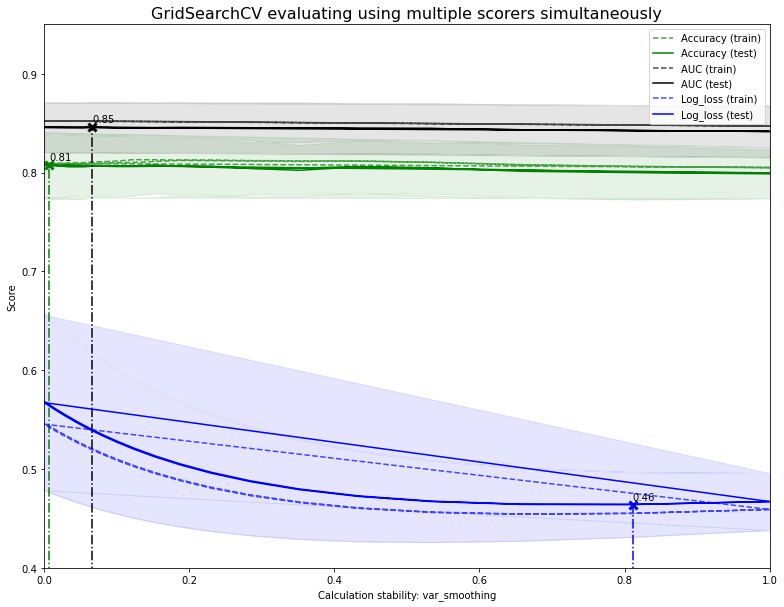

In [65]:
plt.figure(figsize=(13, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("Calculation stability: var_smoothing")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, var_smoothing.max()) 
ax.set_ylim(0.4, 0.95)

X_axis = np.array(results["param_clf__var_smoothing"].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [66]:
print("Accuracy of Naive Bayes: {:.4f}".format(model_accuracies['Naive Bayes']))

Accuracy of Naive Bayes: 0.7985


## <center>Part 06. Метод опорных векторов - Support Vector Machine</center>
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg" width="500px"/><br>
<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg" width="500px"/>

**Support vector machines (SVMs)** могут быть использованы для решения задач классификации, регрессии и обнаружения аномалий (выбросов).

Достоинствами являются:

- Эффективность для пространств больших размерностей
- Эффективность при малом размере выборки (даже меньше количества признаков)
- Эффективность по памяти, так как используют подмножество объектов из обучающей выборки (support vectors) 
- Разные ядровые переходы позволяют находить различные виды зависимостей

Недостатки:

- Напрямую не даёт вероятности принадлежности к классам
- При количестве признаков сильно большем, чем размер обучающей выборки сложно избежать переобучения

Популярна, например, библиотека LIBSVM.

### Построение первой модели

In [67]:
from sklearn.svm import SVC

svm = SVC(random_state=11)
svm.fit(X_train_scaled, y_train)
print("train accuracy:", svm.score(X_train_scaled, y_train))
print("test accuracy:", svm.score(X_test_scaled, y_test))

train accuracy: 0.8459069020866774
test accuracy: 0.8208955223880597


### Выбор подмножества признаков с использованием SelectKBest и f_classif
f_classif оценивает насколько признак хорошо позволяет разделить объекты на нужные классы.

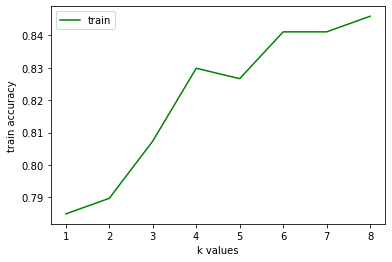

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

accuracy_list_train = []
k = np.arange(1,9)

for i in k:
    x_new = SelectKBest(f_classif, k=i).fit_transform(X_train_scaled, y_train)
    svm.fit(x_new, y_train)
    accuracy_list_train.append(svm.score(x_new, y_train))   
    
plt.plot(k,accuracy_list_train, color="green", label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

Оставляем все 8 нецелевых признаков.

### Подбор гиперпараметров с помощью GridSearchCV и StratifiedKFold
Про гиперпараметры SVC можно найти информацию [тут](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svm).

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import accuracy_score

C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

cv = StratifiedKFold(10)

svm = SVC(random_state=11)
grid_svm = GridSearchCV(estimator=svm, cv=cv, 
        param_grid=dict(kernel=kernel,C=C, gamma=gamma),refit='Accuracy')
grid_svm.fit(X_train_scaled, y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)
model_accuracies['SVM'] = grid_svm.score(X_test_scaled, y_test)
print("test score:", model_accuracies['SVM'])
#print("test score:", accuracy_score(y_test, grid_svm.best_estimator_.predict(X_test_scaled))) # другой способ

best score:  0.829800307219662
best param:  {'C': 0.25, 'gamma': 'scale', 'kernel': 'rbf'}
test score: 0.835820895522388


In [70]:
print("Accuracy of SVM: {:.4f}".format(model_accuracies['SVM']))

Accuracy of SVM: 0.8358


## <center>Part 07. Деревья принятия решений - Decision Trees</center>
<br>
<img src="https://christophm.github.io/interpretable-ml-book/images/tree-artificial-1.jpeg" width="600px"/><br>

**Decision trees (DTs)** могут быть использованы, например, для решения задач классификации, регрессии.

Достоинствами являются:

- Восстановление нелинейных зависимостей произвольной сложности
- Не требуется выбирать заранее тип нелинейности
- Не нужно масштабировать данные
- Высокая интерпетируемость результатов
- Для задачи классификации можно получить вероятности принадлежности к каждому классу
- Хорошо объединяются в композиции –– решающие леса, которые являются одними из наиболее сильных и универсальных моделей

Недостатки:

- Слабые результаты, если обучать только одно дерево
- Склонны к переобучению
- Для повышения качества необходимо настраивать больше количество параметров

### Построение первой модели

In [71]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
print("train accuracy:", decision_tree.score(X_train, y_train))
print("test accuracy:", decision_tree.score(X_test, y_test))

train accuracy: 0.898876404494382
test accuracy: 0.7985074626865671


In [72]:
decision_tree_scaled = DecisionTreeClassifier(random_state=42)
decision_tree_scaled.fit(X_train_scaled, y_train)
print("train_scaled accuracy:", decision_tree.score(X_train_scaled, y_train))
print("test_scaled accuracy:", decision_tree.score(X_test_scaled, y_test))

train_scaled accuracy: 0.6982343499197432
test_scaled accuracy: 0.7238805970149254


Решающие деревья не зависят от разброса значений признаков, их масштабов, выбросов, так сильно, как другие алгоритмы. Поэтому не нужно масштабировать выборку.

### Подбор гиперпараметров с помощью GridSearchCV и StratifiedKFold

Некоторые параметры sklearn.tree.DecisionTreeClassifier:

- criterion : {“gini”, “entropy”, “log_loss”}, default=”gini” –– функция для оценки качества разбиений 
- splitter : {“best”, “random”}, default=”best” –– стратегия разбиения для каждой вершины
- max_depth : int, default=None –– ограничение на максимальную глубину дерева
- min_samples_split : int or float, default=2 –– минимальное число (если float, то доля от выборки) объектов для продолжения разбиений
- min_samples_leaf : int or float, default=1 –– минимальное количество/доля объектов для вершин
- max_features: int, float or {“auto”, “sqrt”, “log2”}, default=None –– количество признаков для рассмотрения при выборе лучшего разбиения

Про гиперпараметры DecisionTreeClassifier можно найти информацию [тут](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import accuracy_score

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9]
min_samples_split = [2, 4, 6, 10]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12]
max_features = [2, 4, 6, 8]

cv = StratifiedKFold(10)

decision_tree = DecisionTreeClassifier(random_state=81)
grid_dt = GridSearchCV(estimator=decision_tree, cv=cv, 
        param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                        max_features= max_features), refit='Accuracy')
grid_dt.fit(X_train, y_train)
print("best score: ", grid_dt.best_score_)
print("best param: ", grid_dt.best_params_)
model_accuracies['Decision Tree'] = grid_dt.score(X_test, y_test)
print("test score:", model_accuracies['Decision Tree'])
#print("test score:", accuracy_score(y_test, grid_dt.best_estimator_.predict(X_test))) # другой способ

best score:  0.836226318484383
best param:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'}
test score: 0.8022388059701493


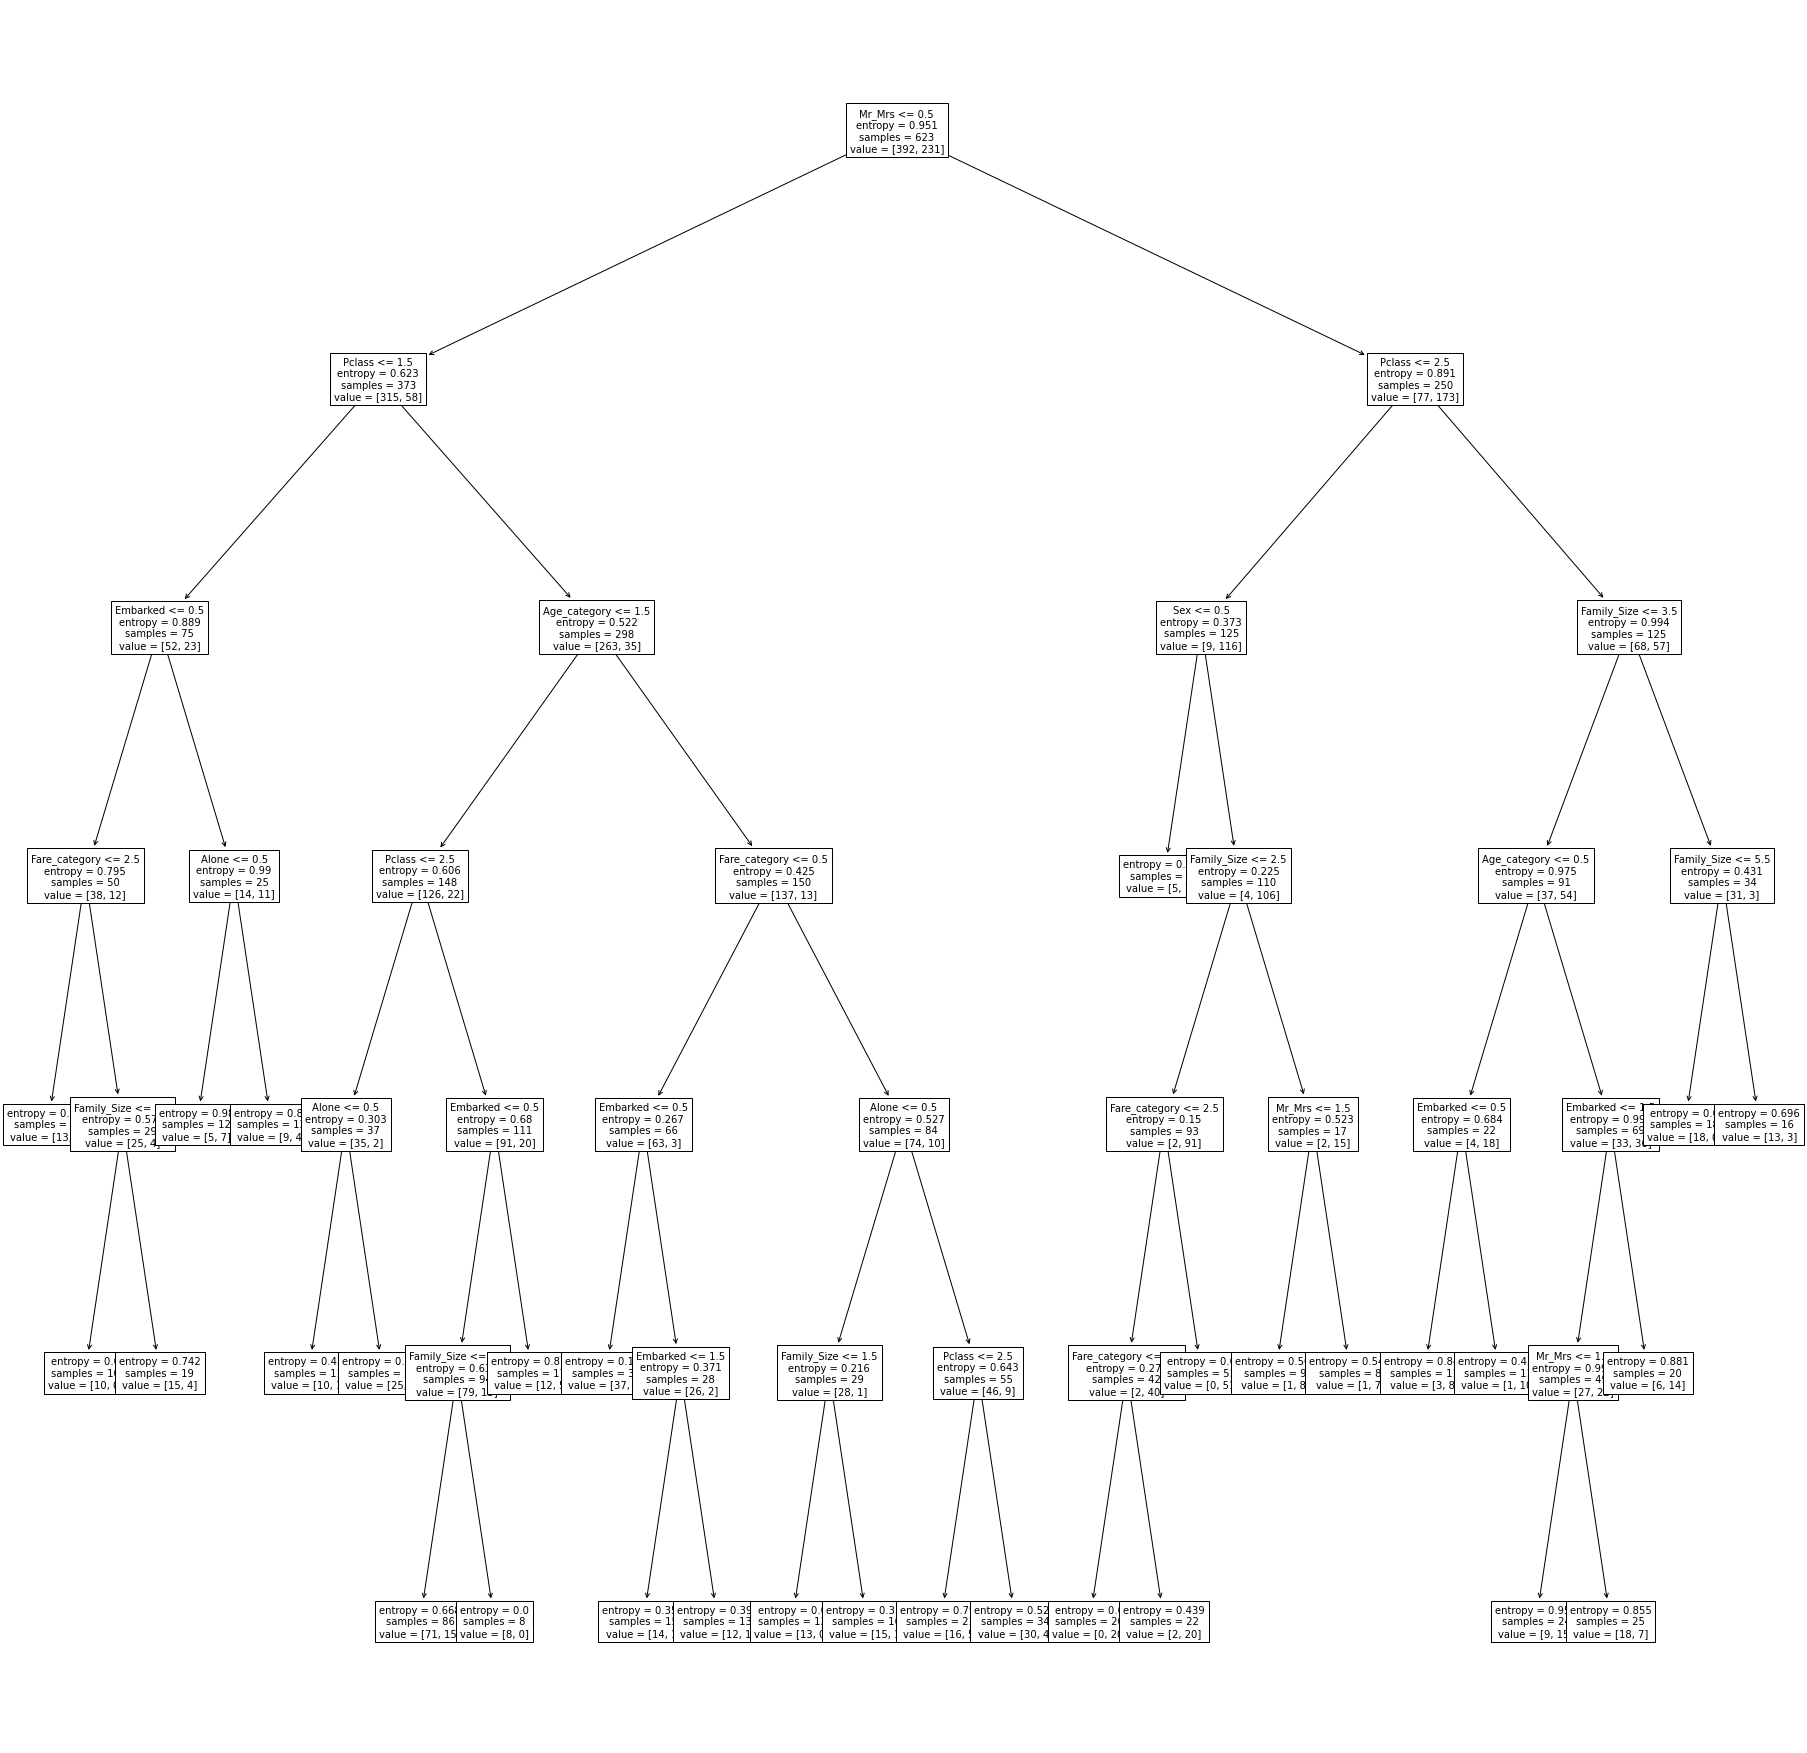

In [74]:
from sklearn import tree
final_decision_tree = grid_dt.best_estimator_

plt.figure(figsize=(32, 32))
tree.plot_tree(final_decision_tree, feature_names=["Pclass","Sex","Embarked","Mr_Mrs","Age_category","Family_Size","Alone","Fare_category"],fontsize=10);

In [75]:
# можно рисовать деревья по-другому
#import graphviz
#dot_data = tree.export_graphviz(final_decision_tree, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("titanic")

In [76]:
print("Accuracy of Decision Tree: {:.4f}".format(model_accuracies['Decision Tree']))

Accuracy of Decision Tree: 0.8022


## Результаты

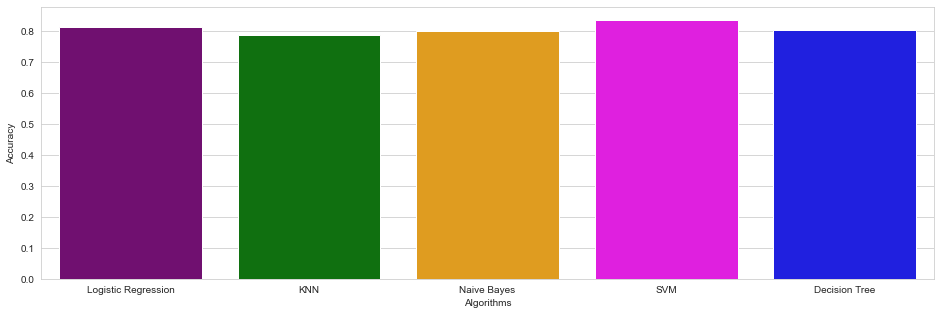

In [77]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette=colors)
plt.show()

## Confusion Matrices

In [78]:
from sklearn.metrics import confusion_matrix

# Predictions
y_pred_logregr = log_clf.best_estimator_.predict(X_test_logregr)
y_pred_knn = knn_clf.best_estimator_.predict(X_test)
y_pred_svm = grid_svm.best_estimator_.predict(X_test_scaled)
y_pred_nb = nb_clf.best_estimator_.predict(X_test)
y_pred_dt = grid_dt.best_estimator_.predict(X_test)

# Confusion Matrices
# TP FP
# FN TN
cm_logregr = confusion_matrix(y_test_logregr, y_pred_logregr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_dt)

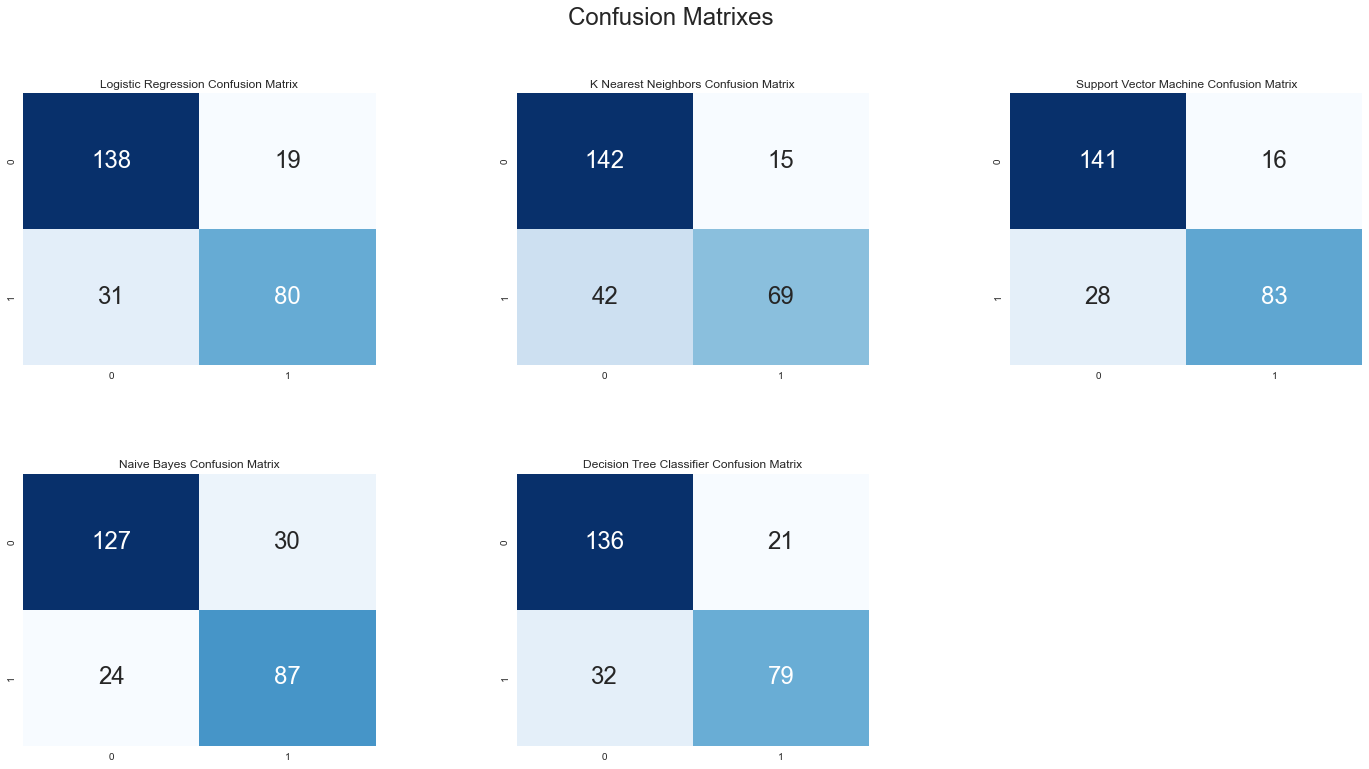

In [79]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logregr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()